# Different fss' total LOC in different versions.

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
linux_version = ["linux-2.6"]
for i in range(20):
    term = "linux-3."+str(i)
    linux_version.append(term)
for i in range(17):
    term = "linux-4."+str(i)
    linux_version.append(term)

In [3]:
linux_version

['linux-2.6',
 'linux-3.0',
 'linux-3.1',
 'linux-3.2',
 'linux-3.3',
 'linux-3.4',
 'linux-3.5',
 'linux-3.6',
 'linux-3.7',
 'linux-3.8',
 'linux-3.9',
 'linux-3.10',
 'linux-3.11',
 'linux-3.12',
 'linux-3.13',
 'linux-3.14',
 'linux-3.15',
 'linux-3.16',
 'linux-3.17',
 'linux-3.18',
 'linux-3.19',
 'linux-4.0',
 'linux-4.1',
 'linux-4.2',
 'linux-4.3',
 'linux-4.4',
 'linux-4.5',
 'linux-4.6',
 'linux-4.7',
 'linux-4.8',
 'linux-4.9',
 'linux-4.10',
 'linux-4.11',
 'linux-4.12',
 'linux-4.13',
 'linux-4.14',
 'linux-4.15',
 'linux-4.16']

In [4]:
fss = ['ext3', 'ext4', 'xfs', 'jfs', 'btrfs', 'reiserfs']

In [5]:
LOC = DataFrame(index=fss,columns=linux_version).fillna(0)

In [6]:
LOC.index

Index(['ext3', 'ext4', 'xfs', 'jfs', 'btrfs', 'reiserfs'], dtype='object')

In [7]:
for i in linux_version:
    file = open("..\\kernel\\"+i+"\\file_size.txt")
    filelines = file.readlines()
    for line in filelines:

        fs = line.split("/")[0]
        try:
            loc = int(line.split()[-2])
            LOC.loc[fs][i]+=loc
        except Exception as e:
            print(i)
            print(line.split())
            print(e)


        


linux-2.6
[]
list index out of range


In [8]:
print(LOC.columns)
LOC

Index(['linux-2.6', 'linux-3.0', 'linux-3.1', 'linux-3.2', 'linux-3.3',
       'linux-3.4', 'linux-3.5', 'linux-3.6', 'linux-3.7', 'linux-3.8',
       'linux-3.9', 'linux-3.10', 'linux-3.11', 'linux-3.12', 'linux-3.13',
       'linux-3.14', 'linux-3.15', 'linux-3.16', 'linux-3.17', 'linux-3.18',
       'linux-3.19', 'linux-4.0', 'linux-4.1', 'linux-4.2', 'linux-4.3',
       'linux-4.4', 'linux-4.5', 'linux-4.6', 'linux-4.7', 'linux-4.8',
       'linux-4.9', 'linux-4.10', 'linux-4.11', 'linux-4.12', 'linux-4.13',
       'linux-4.14', 'linux-4.15', 'linux-4.16'],
      dtype='object')


,linux-2.6,linux-3.0,linux-3.1,linux-3.2,linux-3.3,linux-3.4,linux-3.5,linux-3.6,linux-3.7,linux-3.8,...,linux-4.7,linux-4.8,linux-4.9,linux-4.10,linux-4.11,linux-4.12,linux-4.13,linux-4.14,linux-4.15,linux-4.16
ext3,32275,16944,17017,17047,16960,18269,18282,18265,18300,18296,...,0,0,0,0,0,0,0,0,0,0
ext4,35721,36743,36899,38633,38491,38768,39696,39897,40516,43589,...,50793,49147,49305,49452,49691,50681,52389,52493,52211,52126
xfs,74780,75230,96929,96749,95464,94837,94433,94616,95053,96635,...,60660,62372,69267,67806,68036,69090,69404,69606,69500,69707
jfs,32835,32850,32787,32803,32785,32793,32778,32783,33149,33159,...,33022,33018,33011,33012,33012,33066,33071,33069,33074,33069
btrfs,62942,65337,65290,70065,75566,77926,80015,88185,90233,94149,...,119207,120256,120870,120735,120955,121655,122069,123054,124688,125456
reiserfs,27881,27926,27836,27920,30931,28114,31145,31192,31211,31218,...,32600,32596,32602,32591,32591,32636,32643,32650,32654,32646


In [9]:
LOC.loc['ext3'][:]

linux-2.6     32275
linux-3.0     16944
linux-3.1     17017
linux-3.2     17047
linux-3.3     16960
linux-3.4     18269
linux-3.5     18282
linux-3.6     18265
linux-3.7     18300
linux-3.8     18296
linux-3.9     18307
linux-3.10    18294
linux-3.11    18337
linux-3.12    18369
linux-3.13    18384
linux-3.14    18182
linux-3.15    18153
linux-3.16    18147
linux-3.17    18145
linux-3.18    18147
linux-3.19    18161
linux-4.0     18163
linux-4.1     18160
linux-4.2     18154
linux-4.3         0
linux-4.4         0
linux-4.5         0
linux-4.6         0
linux-4.7         0
linux-4.8         0
linux-4.9         0
linux-4.10        0
linux-4.11        0
linux-4.12        0
linux-4.13        0
linux-4.14        0
linux-4.15        0
linux-4.16        0
Name: ext3, dtype: int64

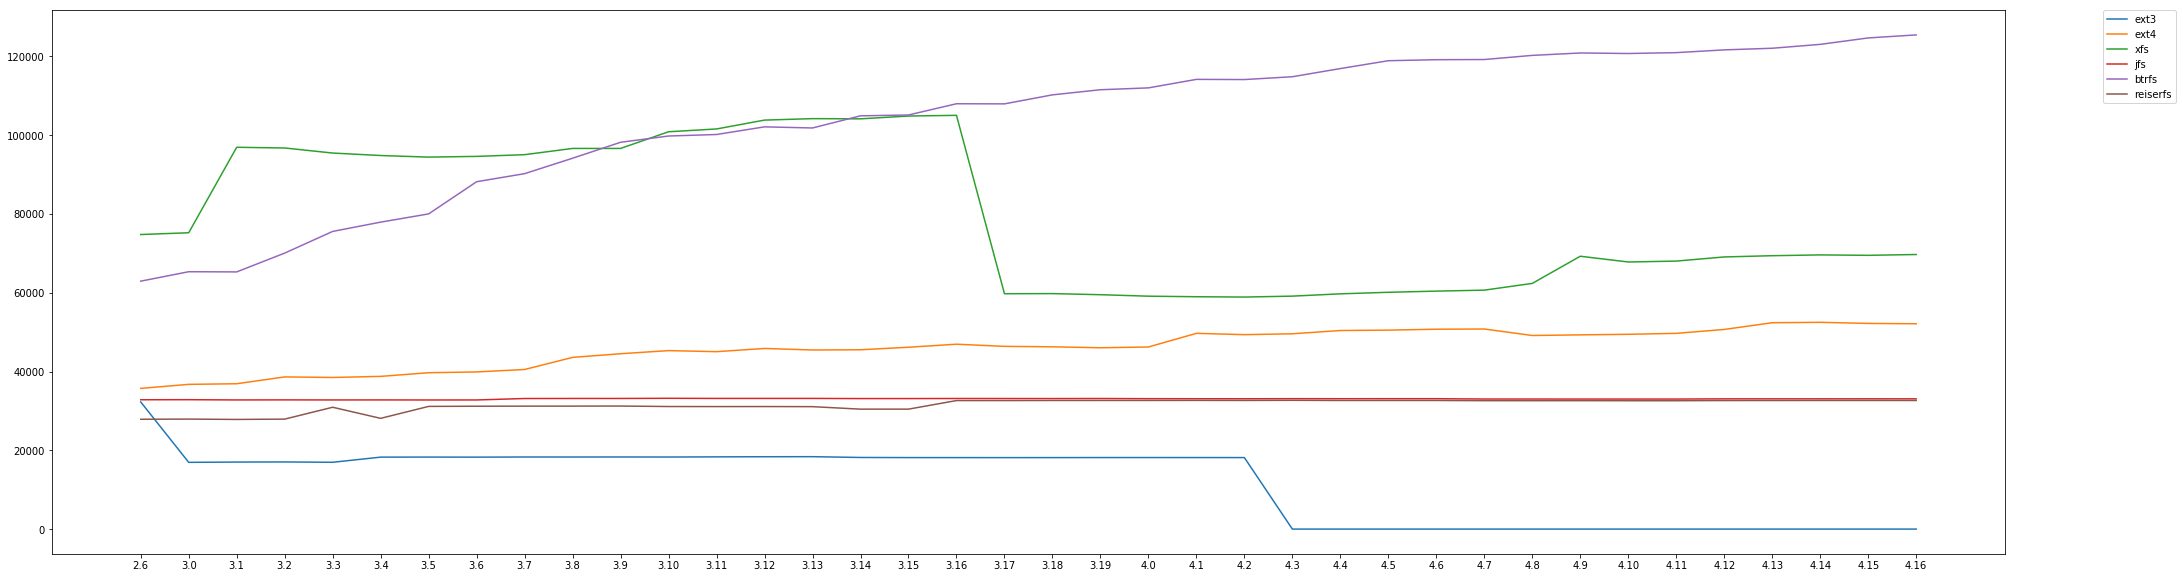

In [10]:
columns = list(LOC.columns[:])
for i in range(len(columns)):
    columns[i] = columns[i][6:]
plt.figure(figsize=(35, 10))
for i in LOC.index:
    plt.plot(np.arange(len(columns)), LOC.loc[i][:])
plt.xticks(np.arange(len(columns)), columns)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../img/Figure3.1.png')
plt.show()

In [11]:
modify_len = DataFrame(index=fss,columns=linux_version).fillna(0)

for i in linux_version:
    for j in fss:
        try:
            file = open("..\\kernel\\"+i+"\\"+j+"\\"+j+"-patches.txt")
        except:
            pass
            #print(i+j)
           # print("There is no document")
        filelines = file.readlines()
        for line in filelines:
            if((line[0]=='+'and line[1]!='+' ) or (line[0]=='-' and line[0]!='-')):
                modify_len.loc[j][i]+=1


In [12]:
modify_len

,linux-2.6,linux-3.0,linux-3.1,linux-3.2,linux-3.3,linux-3.4,linux-3.5,linux-3.6,linux-3.7,linux-3.8,...,linux-4.7,linux-4.8,linux-4.9,linux-4.10,linux-4.11,linux-4.12,linux-4.13,linux-4.14,linux-4.15,linux-4.16
ext3,2,45,21,190,0,149,14,0,0,2,...,0,0,0,0,0,0,0,0,0,0
ext4,0,265,32,1528,5,856,133,170,42,123,...,132,120,449,186,86,23,33,205,13,160
xfs,0,430,54,189,0,55,0,34,58,93,...,16,7,2946,506,268,17,844,238,2,16
jfs,0,26,0,34,0,29,0,0,0,0,...,0,2,14,0,0,8,0,4,0,4
btrfs,0,83,0,665,75,256,2,0,0,215,...,154,341,301,6,12,42,30,673,177,201
reiserfs,0,80,16,146,0,73,0,62,0,2,...,13,13,43,0,2,7,0,5,0,5


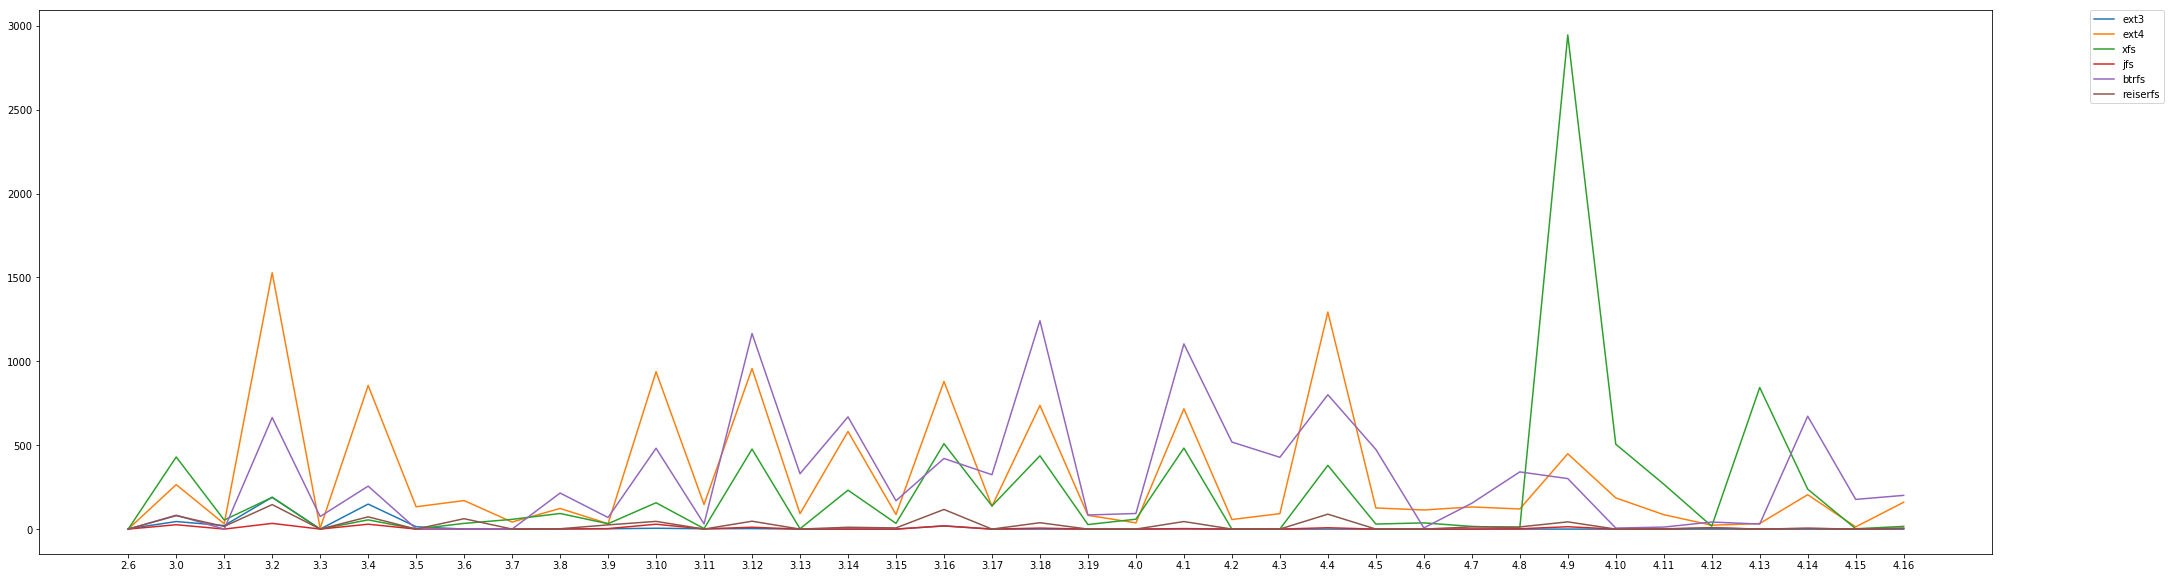

In [13]:
columns = list(modify_len.columns[:])
for i in range(len(columns)):
    columns[i] = columns[i][6:]
plt.figure(figsize=(35, 10))
for i in modify_len.index:
    plt.plot(np.arange(len(columns)), modify_len.loc[i][:])
plt.xticks(np.arange(len(columns)), columns)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../img/Figure3.2.png')
plt.show()

In [14]:
proportion = modify_len.divide(LOC, fill_value=0)
proportion

,linux-2.6,linux-3.0,linux-3.1,linux-3.2,linux-3.3,linux-3.4,linux-3.5,linux-3.6,linux-3.7,linux-3.8,...,linux-4.7,linux-4.8,linux-4.9,linux-4.10,linux-4.11,linux-4.12,linux-4.13,linux-4.14,linux-4.15,linux-4.16
ext3,0.000062,0.002656,0.001234,0.011146,0.000000,0.008156,0.000766,0.000000,0.000000,0.000109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ext4,0.000000,0.007212,0.000867,0.039552,0.000130,0.022080,0.003350,0.004261,0.001037,0.002822,...,0.002599,0.002442,0.009107,0.003761,0.001731,0.000454,0.000630,0.003905,0.000249,0.003069
xfs,0.000000,0.005716,0.000557,0.001954,0.000000,0.000580,0.000000,0.000359,0.000610,0.000962,...,0.000264,0.000112,0.042531,0.007462,0.003939,0.000246,0.012161,0.003419,0.000029,0.000230
jfs,0.000000,0.000791,0.000000,0.001036,0.000000,0.000884,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000061,0.000424,0.000000,0.000000,0.000242,0.000000,0.000121,0.000000,0.000121
btrfs,0.000000,0.001270,0.000000,0.009491,0.000993,0.003285,0.000025,0.000000,0.000000,0.002284,...,0.001292,0.002836,0.002490,0.000050,0.000099,0.000345,0.000246,0.005469,0.001420,0.001602
reiserfs,0.000000,0.002865,0.000575,0.005229,0.000000,0.002597,0.000000,0.001988,0.000000,0.000064,...,0.000399,0.000399,0.001319,0.000000,0.000061,0.000214,0.000000,0.000153,0.000000,0.000153


In [15]:
columns = list(modify_len.columns[:])
for i in columns:
    if math.isnan(proportion.loc['ext3'][i]):
        proportion.loc['ext3'][i] = 0
proportion

,linux-2.6,linux-3.0,linux-3.1,linux-3.2,linux-3.3,linux-3.4,linux-3.5,linux-3.6,linux-3.7,linux-3.8,...,linux-4.7,linux-4.8,linux-4.9,linux-4.10,linux-4.11,linux-4.12,linux-4.13,linux-4.14,linux-4.15,linux-4.16
ext3,0.000062,0.002656,0.001234,0.011146,0.000000,0.008156,0.000766,0.000000,0.000000,0.000109,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ext4,0.000000,0.007212,0.000867,0.039552,0.000130,0.022080,0.003350,0.004261,0.001037,0.002822,...,0.002599,0.002442,0.009107,0.003761,0.001731,0.000454,0.000630,0.003905,0.000249,0.003069
xfs,0.000000,0.005716,0.000557,0.001954,0.000000,0.000580,0.000000,0.000359,0.000610,0.000962,...,0.000264,0.000112,0.042531,0.007462,0.003939,0.000246,0.012161,0.003419,0.000029,0.000230
jfs,0.000000,0.000791,0.000000,0.001036,0.000000,0.000884,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000061,0.000424,0.000000,0.000000,0.000242,0.000000,0.000121,0.000000,0.000121
btrfs,0.000000,0.001270,0.000000,0.009491,0.000993,0.003285,0.000025,0.000000,0.000000,0.002284,...,0.001292,0.002836,0.002490,0.000050,0.000099,0.000345,0.000246,0.005469,0.001420,0.001602
reiserfs,0.000000,0.002865,0.000575,0.005229,0.000000,0.002597,0.000000,0.001988,0.000000,0.000064,...,0.000399,0.000399,0.001319,0.000000,0.000061,0.000214,0.000000,0.000153,0.000000,0.000153


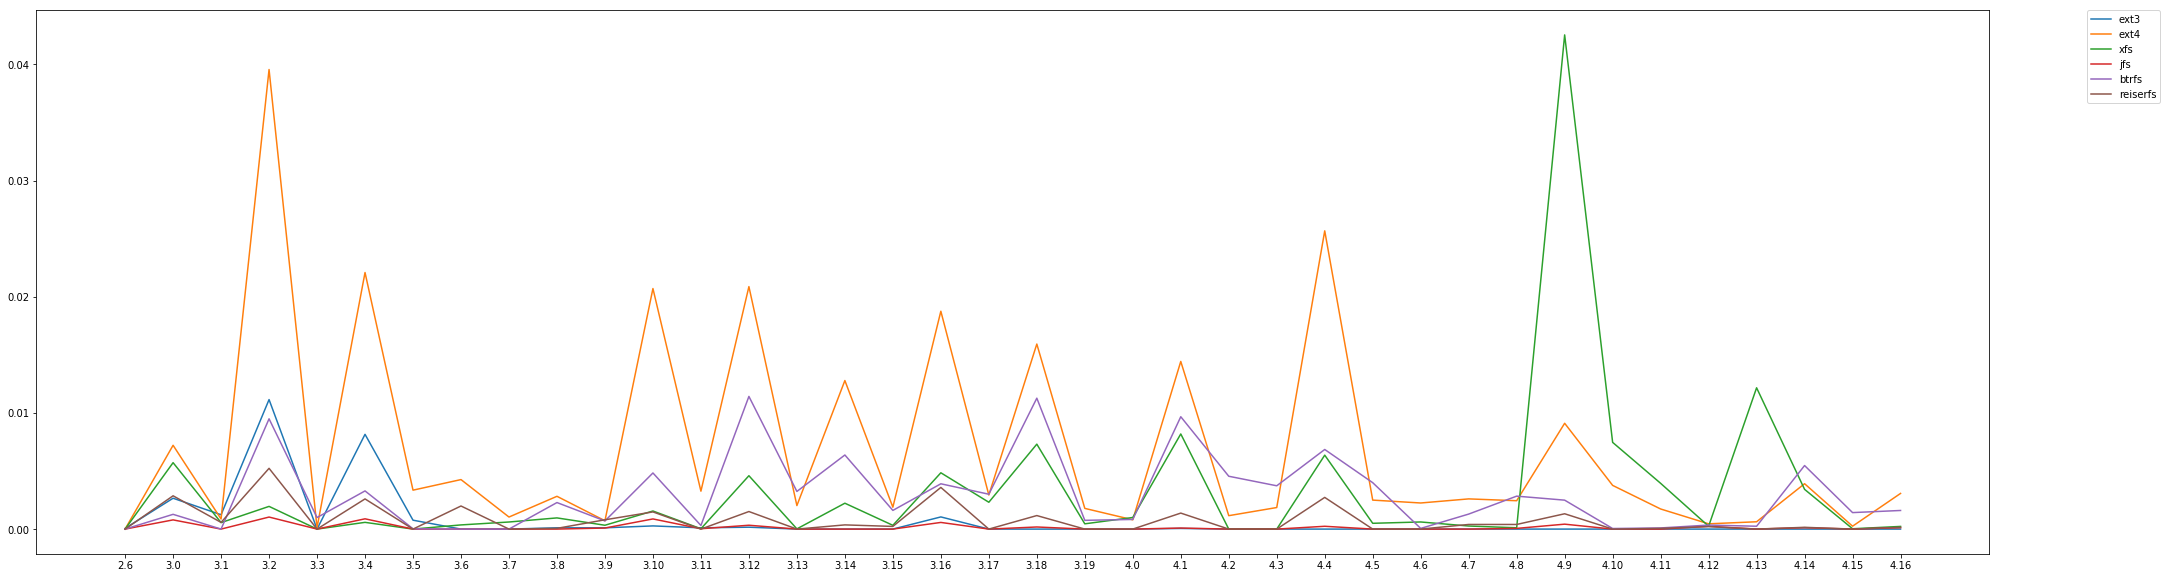

In [21]:
columns = list(proportion.columns[:])
for i in range(len(columns)):
    columns[i] = columns[i][6:]
plt.figure(figsize=(35, 10))
for i in modify_len.index:
    plt.plot(np.arange(len(columns)), proportion.loc[i][:])
plt.xticks(np.arange(len(columns)), columns)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../img/Figure3.3.png')
plt.show()

In [40]:
dirmgn = DataFrame(index=fss,columns=linux_version).fillna(0)
dir_files = {"ext4_dir_files": ["dir.c", "namei.c"],
             "ext3_dir_files": ["dir.c", "namei.c"],
             "xfs_dir_files": ["xfs_qm_bhv.c"],
             "btrfs_dir_files": ["dir-item.c", "root-tree.c"],
             "reiserfs_dir_files": ["dir.c", "namei.c"],
             "jfs_dir_files": ["jfs_dtree.c", "namei.c"],
            }

for i in linux_version:
    for j in fss:
        file_type = j+"_dir_files"
        for k in dir_files[file_type]:
            try:
                file = open("..\\kernel\\"+i+"\\"+j+"\\"+j+"+"+k+"-patches.txt")
                filelines = file.readlines()
                for line in filelines:
                    if((line[0]=='+'and line[1]!='+' ) or (line[0]=='-' and line[0]!='-')):
                        dirmgn.loc[j][i]+=1
            except:
                pass
#                 print(i+j)
#                 print("There is no document")

dirmgn

,linux-2.6,linux-3.0,linux-3.1,linux-3.2,linux-3.3,linux-3.4,linux-3.5,linux-3.6,linux-3.7,linux-3.8,...,linux-4.7,linux-4.8,linux-4.9,linux-4.10,linux-4.11,linux-4.12,linux-4.13,linux-4.14,linux-4.15,linux-4.16
ext3,0,2,0,124,0,124,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ext4,0,8,0,222,0,69,0,0,3,0,...,10,6,27,4,2,0,0,6,0,7
xfs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jfs,0,23,0,25,0,25,0,0,0,0,...,0,0,4,0,0,0,0,4,0,4
btrfs,0,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,0,0,0,0,0
reiserfs,0,0,0,4,0,4,0,0,0,0,...,0,0,4,0,0,0,0,4,0,4


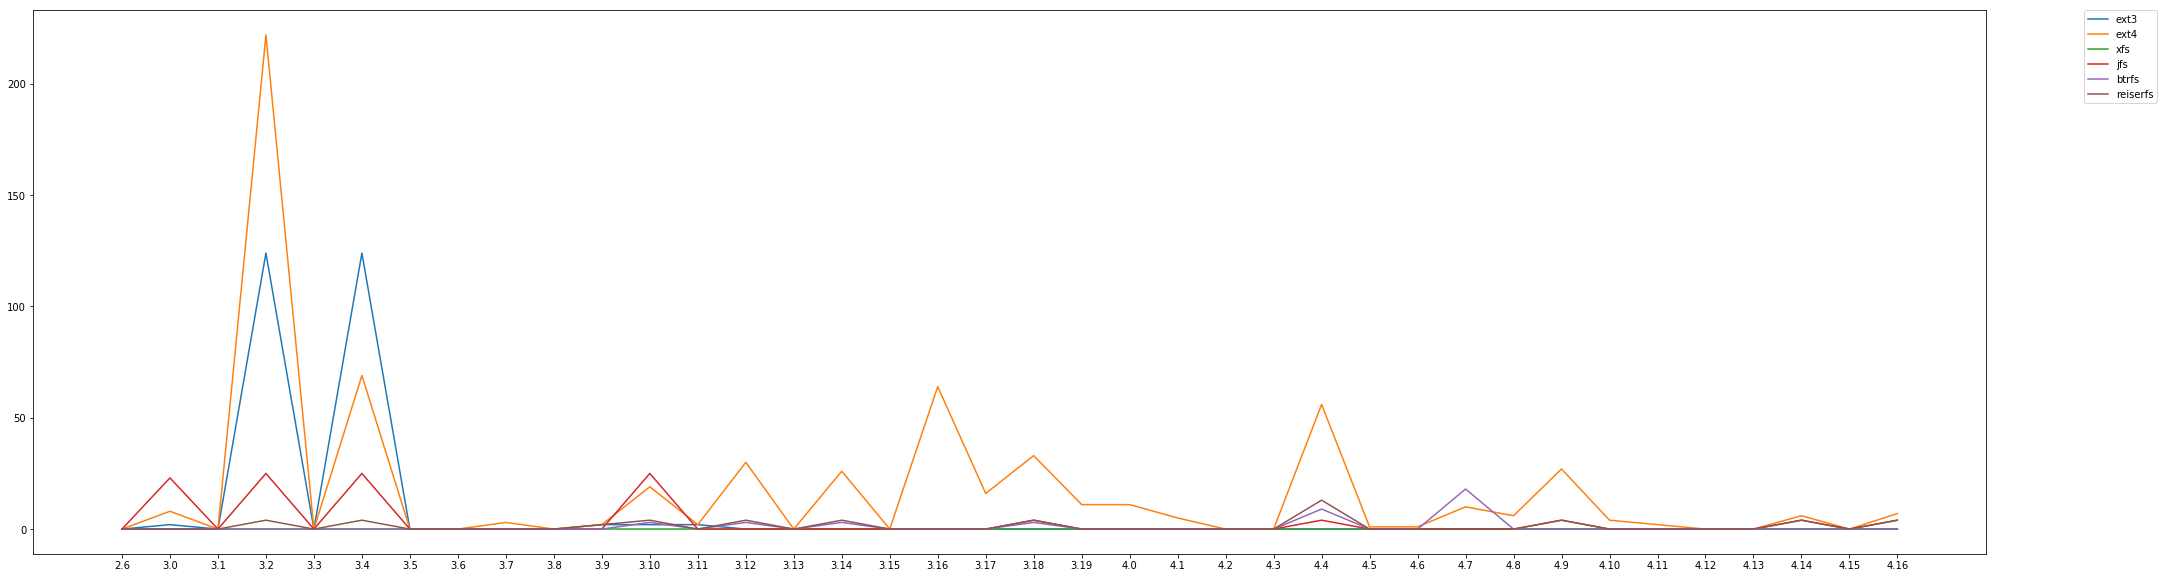

In [41]:
columns = list(dirmgn.columns[:])
for i in range(len(columns)):
    columns[i] = columns[i][6:]
plt.figure(figsize=(35, 10))
for i in modify_len.index:
    plt.plot(np.arange(len(columns)), dirmgn.loc[i][:])
plt.xticks(np.arange(len(columns)), columns)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../img/Figure3.4.png')
plt.show()

In [27]:
blockmgn = DataFrame(index=fss,columns=linux_version).fillna(0)
block_files = {"ext4_block_files": ["balloc.c", "block_validity.c",  "ext4_jbd2.c", "mballoc.c", "migrate.c", "super.c", "extents.c", "extents_status.c"],
             "ext3_block_files": ["balloc.c", "ext3_jbd.c", "super.c"],
             "xfs_block_files": ["xfs_attr_incative.c, xfs_mount.c", "xfs_super.c", "xfs_extfree_item.c"],
             "btrfs_block_files": ["delayed-ref.c", "extent_map.c", "free-space-cache.c", "ctree.c", "relocation.c"],
             "reiserfs_block_files": ["bitmap.c",  "do_balan.c", "stree.c", "tail_conversion.c"],
             "jfs_block_files": ["jfs_dmap.c", "jfs_extent.c", "jfs_xtree.c", "super.c"],
            }

for i in linux_version:
    for j in fss:
        file_type = j+"_block_files"
        for k in block_files[file_type]:
            try:
                file = open("..\\kernel\\"+i+"\\"+j+"\\"+j+"+"+k+"-patches.txt")
                filelines = file.readlines()
                for line in filelines:
                    if((line[0]=='+'and line[1]!='+' ) or (line[0]=='-' and line[0]!='-')):
                        blockmgn.loc[j][i]+=1
            except:
                pass
#                 print(i+j)
#                 print("There is no document")

blockmgn

,linux-2.6,linux-3.0,linux-3.1,linux-3.2,linux-3.3,linux-3.4,linux-3.5,linux-3.6,linux-3.7,linux-3.8,...,linux-4.7,linux-4.8,linux-4.9,linux-4.10,linux-4.11,linux-4.12,linux-4.13,linux-4.14,linux-4.15,linux-4.16
ext3,2,2,0,2,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
ext4,0,78,11,685,1,416,45,60,32,64,...,29,63,174,32,42,0,31,63,1,52
xfs,0,0,0,2,0,2,0,0,0,0,...,0,0,10,1,8,0,1,0,0,0
jfs,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
btrfs,0,7,0,0,0,7,0,0,0,34,...,0,33,15,0,0,0,1,40,0,31
reiserfs,0,4,0,4,0,4,0,4,0,0,...,0,0,11,0,0,0,0,0,0,0


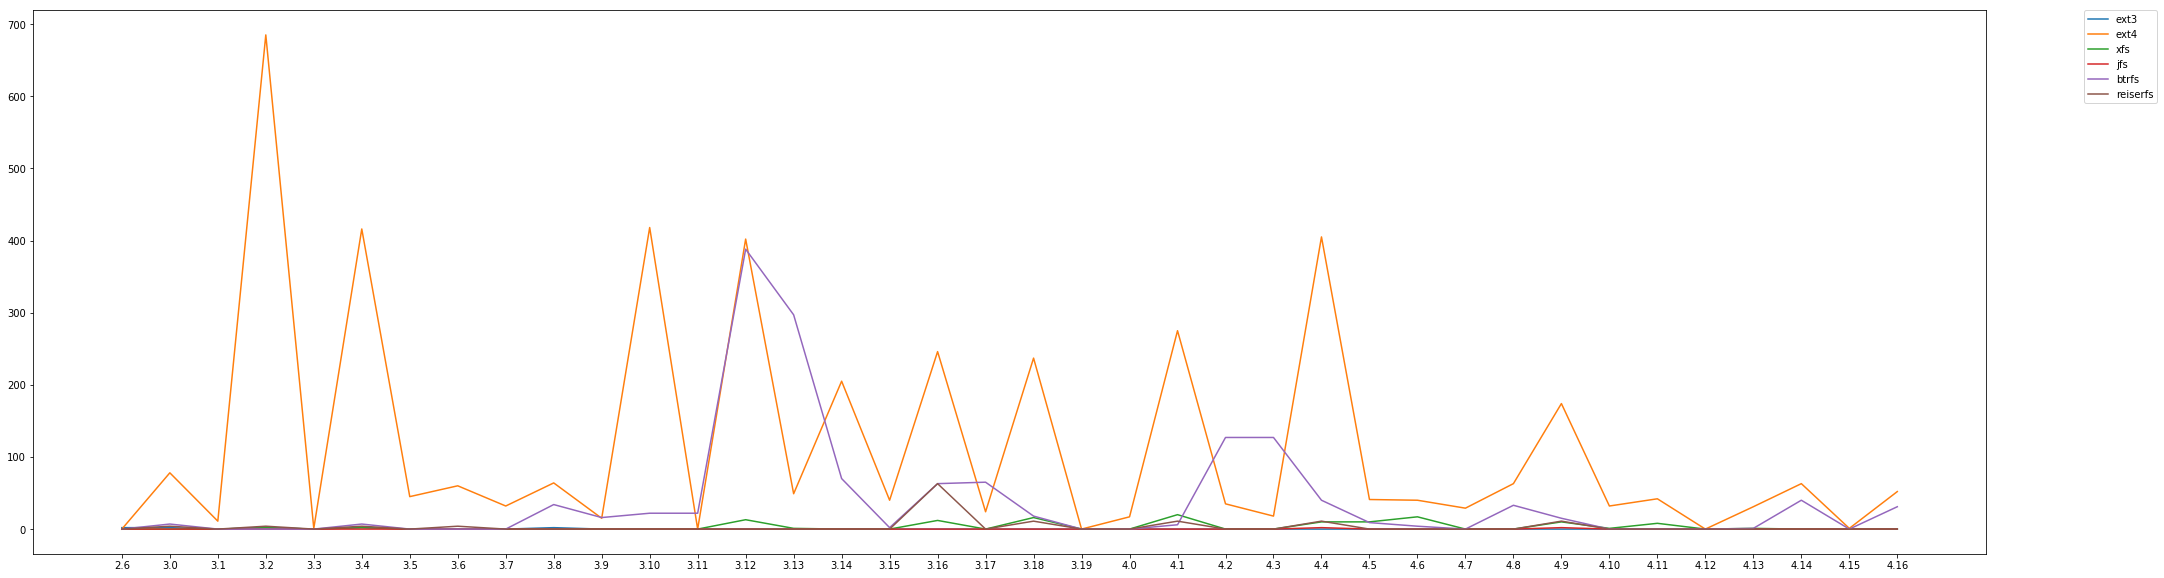

In [30]:
columns = list(blockmgn.columns[:])
for i in range(len(columns)):
    columns[i] = columns[i][6:]
plt.figure(figsize=(35, 10))
for i in modify_len.index:
    plt.plot(np.arange(len(columns)), blockmgn.loc[i][:])
plt.xticks(np.arange(len(columns)), columns)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../img/Figure3.5.png')
plt.show()

In [31]:
inodemgn = DataFrame(index=fss,columns=linux_version).fillna(0)
inode_files = {"ext4_inode_files": ["inode.c", "inline.c"],
             "ext3_inode_files": ["inode.c", "inline.c"],
             "xfs_inode_files": ["xfs_icache.c", "xfs_inode.c", "xfs_inode_item.c", "xfs_rtalloc.c"],
             "btrfs_inode_files": ["delayed-inode.c", "inode-item.c", "inode-map.c", "inode.c"],
             "reiserfs_inode_files": ["fix_node.c", "ibalance.c", "inode.c"],
             "jfs_inode_files": ["inode.c", "jfs_inode.c", "jfs_imap.c"],
            }

for i in linux_version:
    for j in fss:
        file_type = j+"_inode_files"
        for k in inode_files[file_type]:
            try:
                file = open("..\\kernel\\"+i+"\\"+j+"\\"+j+"+"+k+"-patches.txt")
                filelines = file.readlines()
                for line in filelines:
                    if((line[0]=='+'and line[1]!='+' ) or (line[0]=='-' and line[0]!='-')):
                        inodemgn.loc[j][i]+=1
            except:
                pass
#                 print(i+j)
#                 print("There is no document")

inodemgn

,linux-2.6,linux-3.0,linux-3.1,linux-3.2,linux-3.3,linux-3.4,linux-3.5,linux-3.6,linux-3.7,linux-3.8,...,linux-4.7,linux-4.8,linux-4.9,linux-4.10,linux-4.11,linux-4.12,linux-4.13,linux-4.14,linux-4.15,linux-4.16
ext3,0,35,21,19,0,16,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ext4,0,56,9,268,0,111,16,17,2,12,...,39,26,122,75,10,0,0,29,12,9
xfs,0,28,0,0,0,0,0,0,0,0,...,0,0,305,47,54,0,113,23,2,0
jfs,0,1,0,2,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
btrfs,0,3,0,130,0,29,0,0,0,31,...,0,11,69,6,2,4,20,148,67,28
reiserfs,0,12,0,30,0,12,0,12,0,0,...,2,0,1,0,0,0,0,0,0,0


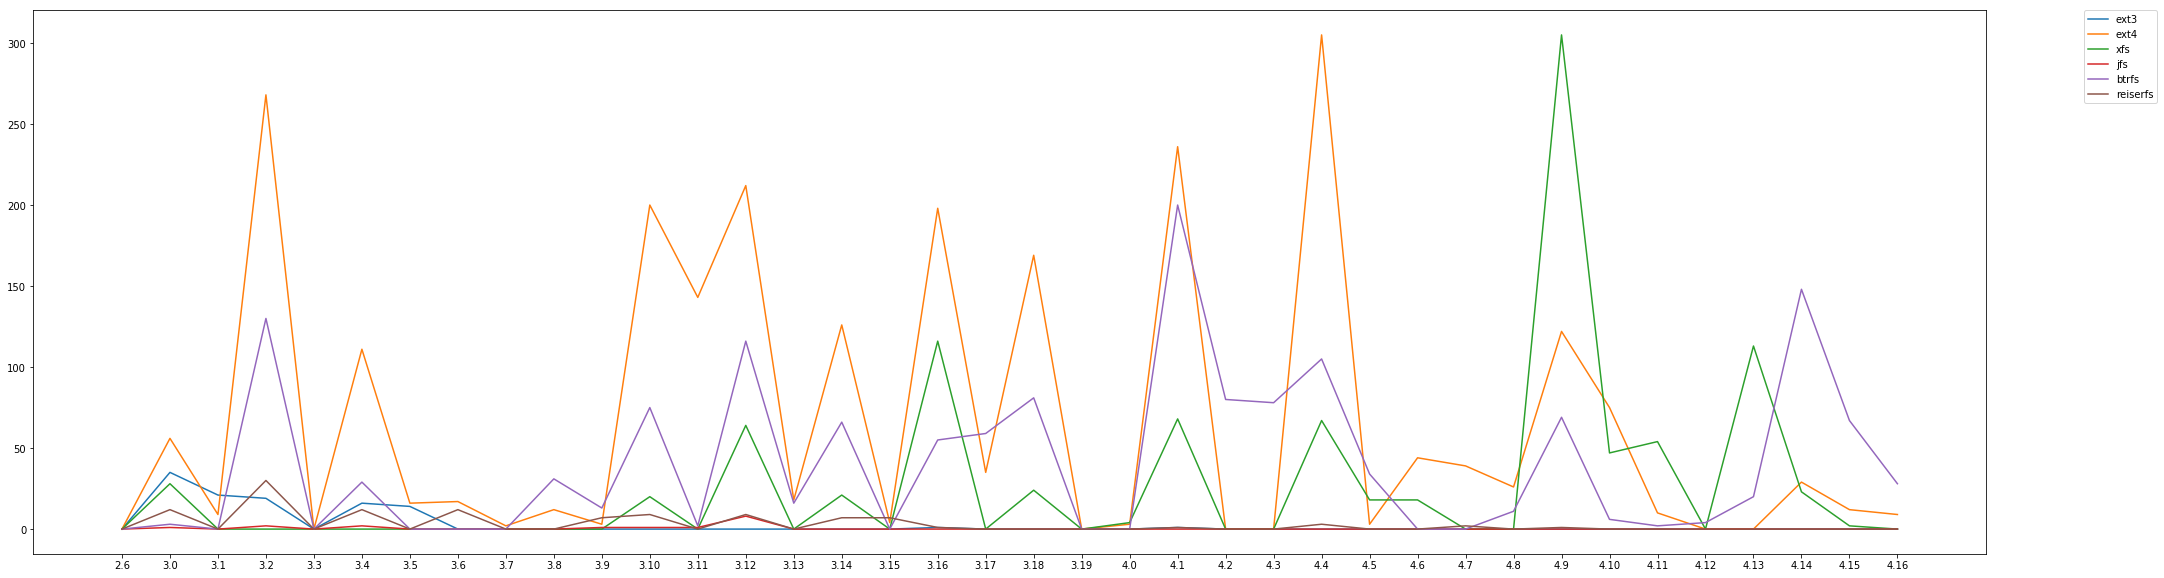

In [36]:
columns = list(inodemgn.columns[:])
for i in range(len(columns)):
    columns[i] = columns[i][6:]
plt.figure(figsize=(35, 10))
for i in modify_len.index:
    plt.plot(np.arange(len(columns)), inodemgn.loc[i][:])
plt.xticks(np.arange(len(columns)), columns)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../img/Figure3.6.png')
plt.show()

In [33]:
filemgn = DataFrame(index=fss,columns=linux_version).fillna(0)
file_files = {"ext4_file_files": ["file.c"],
             "ext3_file_files": ["file.c"],
             "xfs_file_files": ["xfs_dir2_readdir.c","xfs_discard.c","xfs_fsops.c","xfs_quota.c"],
             "btrfs_file_files": ["file-item.c", "file.c", "qgroup.c "],
             "reiserfs_file_files": ["file.c"],
             "jfs_file_files": ["file.c", "jfs_mount.c", "jfs_unmount.c"],
            }

for i in linux_version:
    for j in fss:
        file_type = j+"_file_files"
        for k in file_files[file_type]:
            try:
                file = open("..\\kernel\\"+i+"\\"+j+"\\"+j+"+"+k+"-patches.txt")
                filelines = file.readlines()
                for line in filelines:
                    if((line[0]=='+'and line[1]!='+' ) or (line[0]=='-' and line[0]!='-')):
                        filemgn.loc[j][i]+=1
            except:
                pass
#                 print(i+j)
#                 print("There is no document")

filemgn

,linux-2.6,linux-3.0,linux-3.1,linux-3.2,linux-3.3,linux-3.4,linux-3.5,linux-3.6,linux-3.7,linux-3.8,...,linux-4.7,linux-4.8,linux-4.9,linux-4.10,linux-4.11,linux-4.12,linux-4.13,linux-4.14,linux-4.15,linux-4.16
ext3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ext4,0,0,0,1,0,1,0,0,0,0,...,0,0,20,0,31,3,2,0,0,0
xfs,0,0,0,2,0,0,0,0,0,0,...,0,0,21,0,0,0,0,7,0,7
jfs,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
btrfs,0,0,0,15,0,1,0,0,0,0,...,5,0,13,0,0,4,0,12,0,0
reiserfs,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


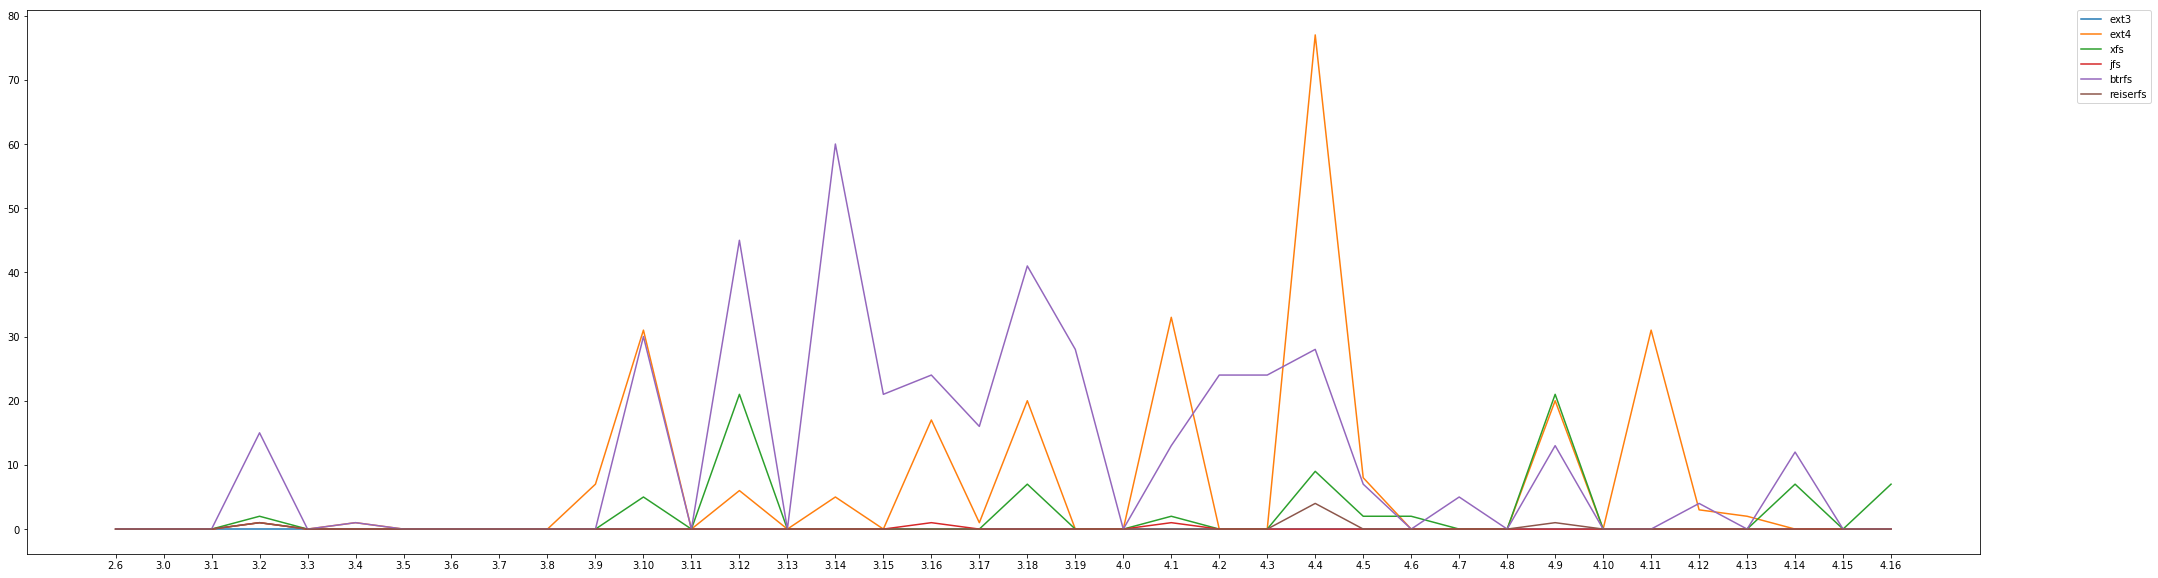

In [35]:
columns = list(filemgn.columns[:])
for i in range(len(columns)):
    columns[i] = columns[i][6:]
plt.figure(figsize=(35, 10))
for i in modify_len.index:
    plt.plot(np.arange(len(columns)), filemgn.loc[i][:])
plt.xticks(np.arange(len(columns)), columns)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../img/Figure3.7.png')
plt.show()

In [38]:
IOmgn = DataFrame(index=fss,columns=linux_version).fillna(0)
IO_files = {"ext4_IO_files": ["fsync.c", "ioctl.c", "move_extent.c", "mmp.c", "page-io.c"],
             "ext3_IO_files": ["fsync.c", "ioctl.c"],
             "xfs_IO_files": ["xfs.export.c", "xfs_export_busy.c","xfs_extent_busy.c","xfs_file.c","xfs_filestream.c","xfs_ioctl.c","xfs_ioctl32.c","xfs_log_recover.c","xfs_aops.c","xfs_bit.c","xfs_bmap_util.c","xfs_buf.c","xfs_dquot.c","xfs_dquot_item.c","xfs_iomap.c","xfs_qm.c","xfs_quotaops.c"],
             "btrfs_IO_files": ["check-integrity.c", "dev-replace.c", "disk-io.c", "extent_io.c", "ioctl.c", "ordered-data.c", "orphan.c", "print-tree.c",  "raid56.c", "reada.c", "send.c"],
             "reiserfs_IO_files": ["ioctl.c", "prints.c", "super.c"],
             "jfs_IO_files": ["ioctl.c", "jfs_metaPage.c"]
            }

for i in linux_version:
    for j in fss:
        file_type = j+"_IO_files"
        for k in IO_files[file_type]:
            try:
                file = open("..\\kernel\\"+i+"\\"+j+"\\"+j+"+"+k+"-patches.txt")
                filelines = file.readlines()
                for line in filelines:
                    if((line[0]=='+'and line[1]!='+' ) or (line[0]=='-' and line[0]!='-')):
                        IOmgn.loc[j][i]+=1
            except:
                pass
#                 print(i+j)
#                 print("There is no document")

IOmgn

,linux-2.6,linux-3.0,linux-3.1,linux-3.2,linux-3.3,linux-3.4,linux-3.5,linux-3.6,linux-3.7,linux-3.8,...,linux-4.7,linux-4.8,linux-4.9,linux-4.10,linux-4.11,linux-4.12,linux-4.13,linux-4.14,linux-4.15,linux-4.16
ext3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ext4,0,44,12,114,0,70,53,53,0,8,...,13,7,1,0,0,0,0,16,0,3
xfs,0,12,30,45,0,16,0,13,55,0,...,13,1,870,104,79,0,343,169,0,9
jfs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
btrfs,0,8,0,329,2,45,2,0,0,33,...,72,158,50,0,0,25,6,143,0,19
reiserfs,0,62,16,57,0,51,0,46,0,0,...,11,11,15,0,0,0,0,0,0,0


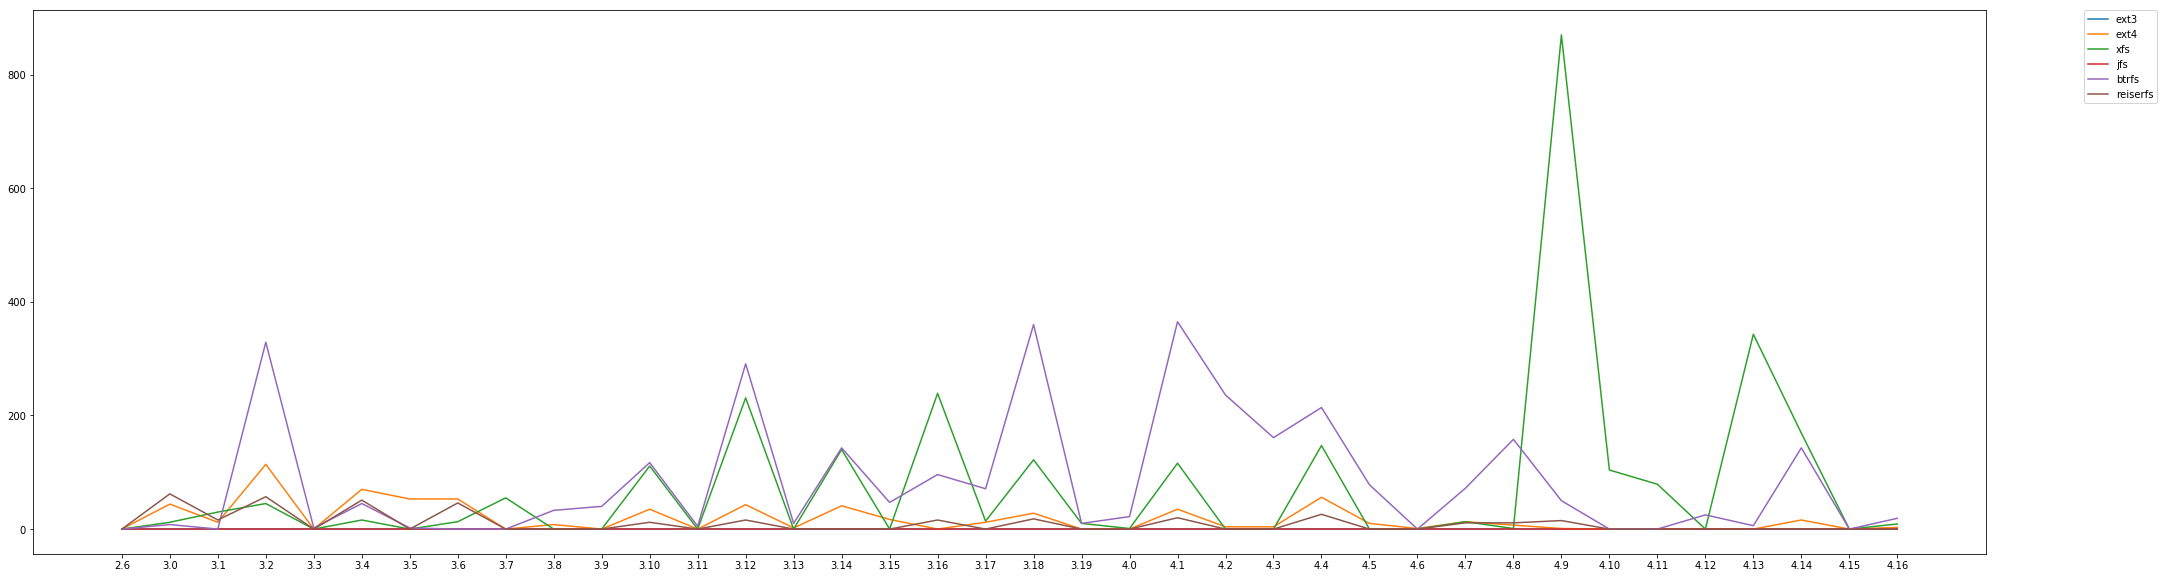

In [50]:
columns = list(IOmgn.columns[:])
for i in range(len(columns)):
    columns[i] = columns[i][6:]
plt.figure(figsize=(35, 10))
for i in modify_len.index:
    plt.plot(np.arange(len(columns)), IOmgn.loc[i][:])
plt.xticks(np.arange(len(columns)), columns)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../img/Figure3.8.png')
plt.show()

In [44]:
extendmgn = DataFrame(index=fss,columns=linux_version).fillna(0)
extend_files = {"ext4_extend_files": ["xattr.c", "xattr_security.c", "xattr_user.c", "xattr_trusted.c"],
             "ext3_extend_files": ["xattr.c", "xattr_security.c", "xattr_user.c", "xattr_trusted.c"],
             "xfs_extend_files": ["xfs_attr_list.c","xfs_buf_item.c","xfs_icreate_item.c","xfs_qm_syscalls.c","xfs_trace.c","xfs_trans.c","xfs_trans_ail.c","xfs_trans_buf.c","xfs_trans_dquot.c","xfs_trans_extfree.c","xfs_xattr.c"],
             "btrfs_extend_files": ["export.c", "extent-tree.c", "props.c", "sysfs.c", "transaction.c",  "volumes.c", "xattr.c"],
             "reiserfs_extend_files": ["item_ops.c", "xattr.c" "xattr_acl.c", "xattr_trusted.c", "xattr_user.c"],
             "jfs_extend_files": ["xattr.c"]
            }

for i in linux_version:
    for j in fss:
        file_type = j+"_extend_files"
        for k in extend_files[file_type]:
            try:
                file = open("..\\kernel\\"+i+"\\"+j+"\\"+j+"+"+k+"-patches.txt")
                filelines = file.readlines()
                for line in filelines:
                    if((line[0]=='+'and line[1]!='+' ) or (line[0]=='-' and line[0]!='-')):
                        extendmgn.loc[j][i]+=1
            except:
                pass
#                 print(i+j)
#                 print("There is no document")

extendmgn

,linux-2.6,linux-3.0,linux-3.1,linux-3.2,linux-3.3,linux-3.4,linux-3.5,linux-3.6,linux-3.7,linux-3.8,...,linux-4.7,linux-4.8,linux-4.9,linux-4.10,linux-4.11,linux-4.12,linux-4.13,linux-4.14,linux-4.15,linux-4.16
ext3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ext4,0,12,0,37,4,33,0,0,0,6,...,38,0,44,43,0,0,0,68,0,68
xfs,0,161,0,0,0,0,0,18,0,0,...,1,1,224,1,24,0,141,0,0,0
jfs,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
btrfs,0,8,0,81,1,111,0,0,0,49,...,0,72,50,0,4,0,0,147,51,45
reiserfs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


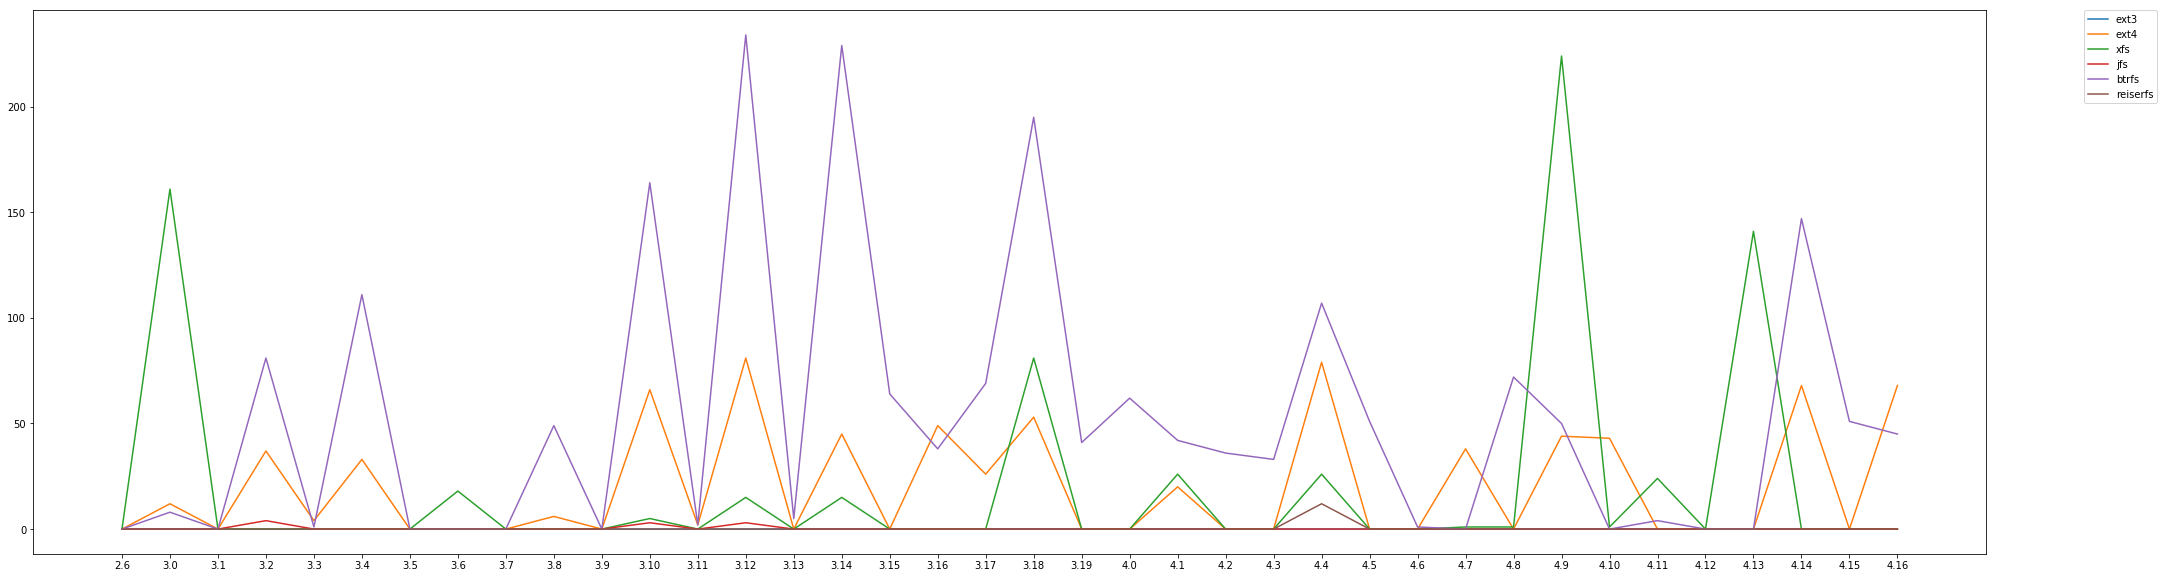

In [51]:
columns = list(extendmgn.columns[:])
for i in range(len(columns)):
    columns[i] = columns[i][6:]
plt.figure(figsize=(35, 10))
for i in modify_len.index:
    plt.plot(np.arange(len(columns)), extendmgn.loc[i][:])
plt.xticks(np.arange(len(columns)), columns)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../img/Figure3.9.png')
plt.show()

In [48]:
othermgn = DataFrame(index=fss,columns=linux_version).fillna(0)
other_files = {"ext4_other_files": ["bitmap.c", "hash.c", "resize.c", "symlink.c", "acl.c"],
             "ext3_other_files": ["bitmap.c", "hash.c", "resize.c", "symlink.c", "acl.c"],
             "xfs_other_files": ["mrlock.c", "kmem.c","uuid.c","xfs_globals.c","xfs_itable.c","xfs_linux.c","xfs_mru_cache.c","xfs_stats.c","xfs_symlink.c","xfs_sysctl.c","xfs_sysfs.c","xfs_error.c","xfs_log.c","xfs_log_cil.c","xfs_message.c"],
             "btrfs_other_files": ["async-thread.c","backref.c", "compression.c", "hash.c", "locking.c", "lzo.c", "tree-defrag.c", "tree-log.c", "zlib.c", "acl.c"],
             "reiserfs_other_files": ["hashes.c", "lock.c", "objectid.c", "procfs.c", "resize.c"],
             "jfs_other_files": ["jfs_debug.c", "jfs_discard.c", "jfs_logmgr.c", "jfs_txnmgr.c", "jfs_unicode.c", "jfs_unupr.c", "symlink.c", "acl.c"]
            }

for i in linux_version:
    for j in fss:
        file_type = j+"_other_files"
        for k in other_files[file_type]:
            try:
                file = open("..\\kernel\\"+i+"\\"+j+"\\"+j+"+"+k+"-patches.txt")
                filelines = file.readlines()
                for line in filelines:
                    if((line[0]=='+'and line[1]!='+' ) or (line[0]=='-' and line[0]!='-')):
                        othermgn.loc[j][i]+=1
            except:
                pass
#                 print(i+j)
#                 print("There is no document")

othermgn

,linux-2.6,linux-3.0,linux-3.1,linux-3.2,linux-3.3,linux-3.4,linux-3.5,linux-3.6,linux-3.7,linux-3.8,...,linux-4.7,linux-4.8,linux-4.9,linux-4.10,linux-4.11,linux-4.12,linux-4.13,linux-4.14,linux-4.15,linux-4.16
ext3,0,0,0,39,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ext4,0,10,0,57,0,52,19,25,4,15,...,0,5,17,0,0,19,0,0,0,0
xfs,0,0,0,2,0,0,0,0,2,0,...,0,0,44,0,1,1,25,0,0,0
jfs,0,2,0,2,0,2,0,0,0,0,...,0,2,8,0,0,8,0,0,0,0
btrfs,0,56,0,75,66,59,0,0,0,64,...,3,27,84,0,4,7,0,117,41,74
reiserfs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


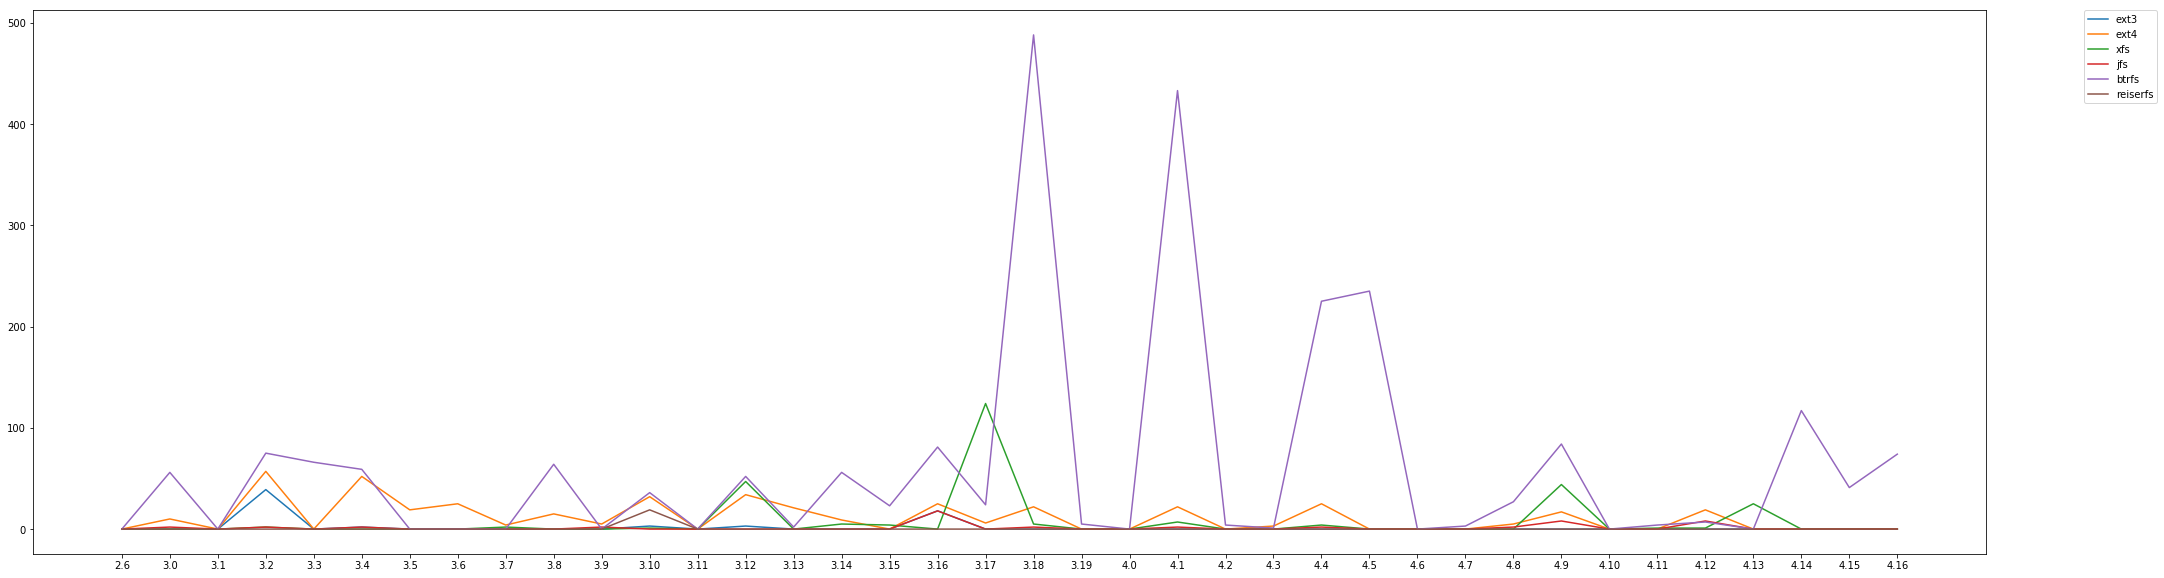

In [52]:
columns = list(othermgn.columns[:])
for i in range(len(columns)):
    columns[i] = columns[i][6:]
plt.figure(figsize=(35, 10))
for i in modify_len.index:
    plt.plot(np.arange(len(columns)), othermgn.loc[i][:])
plt.xticks(np.arange(len(columns)), columns)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../img/Figure3.10.png')
plt.show()